In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie(
    "2025-09-25 12:00", 
    model="hrrr", 
    product="sfc", 
    fxx=6
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Sep-25 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
# Show available products
H.PRODUCTS

{'sfc': '2D surface level fields; 3-km resolution',
 'prs': '3D pressure level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [4]:
ds = H.xarray("TMP:2 m above")
ds

<xarray.Dataset> Size: 38MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2025-09-25T12:00:00
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2025-09-25T18:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 8MB 296.0 296.0 296.0 ... 286.8 286.9
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /Users/john_b_needham/data/hrrr/20250925/subset_...
    search:                  TMP:2 m above

Text(1.0, 1.0, '2 metre temperature')

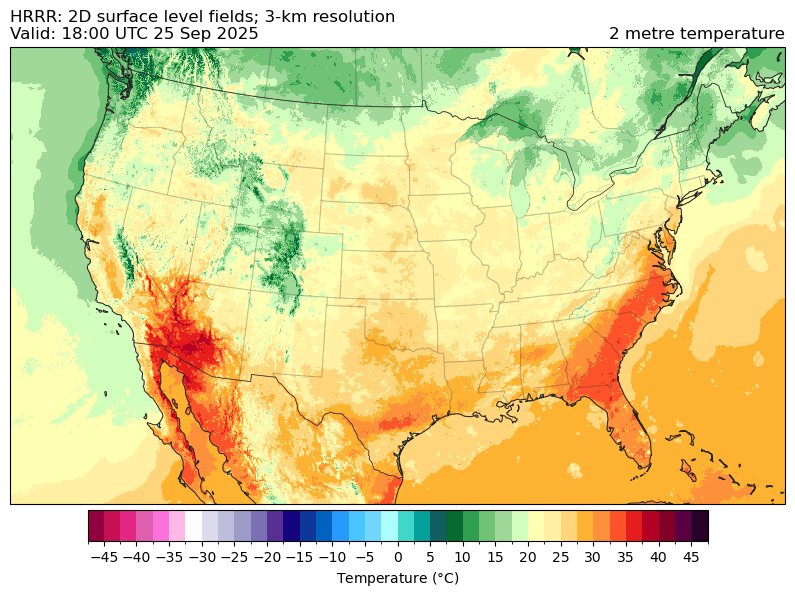

In [5]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **paint.NWSTemperature.cbar_kwargs2,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")